In [1]:
# import necessary libraries

from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns
import numpy as np

import scipy.stats as stats

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# import dataset

df = pd.read_csv("credit_card.csv")

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#checking for missing and types of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
#FIRST DROP COLUMNS WITH MISSING DATA BC WILL MESS WITH ZSCORES
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [5]:
#determine and (possibly) remove outliers
#1. balance
df["zscore_balance"] = np.abs(stats.zscore(df["BALANCE"]))
balance_outliers = df.loc[df["zscore_balance"] > 3].index

print(balance_outliers)

##many outliers for balance

df = df[df["zscore_balance"] <= 3]

df.info()

Int64Index([  30,   87,   90,  120,  124,  128,  133,  138,  143,  153,
            ...
            6445, 6455, 6479, 6600, 6629, 6838, 7132, 7427, 7764, 7962],
           dtype='int64', length=186)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8450 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8450 non-null   object 
 1   BALANCE                           8450 non-null   float64
 2   BALANCE_FREQUENCY                 8450 non-null   float64
 3   PURCHASES                         8450 non-null   float64
 4   ONEOFF_PURCHASES                  8450 non-null   float64
 5   INSTALLMENTS_PURCHASES            8450 non-null   float64
 6   CASH_ADVANCE                      8450 non-null   float64
 7   PURCHASES_FREQUENCY               8450 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8450 non-null   float64
 

In [6]:
#determine and (possibly) remove outliers
#2. balance frequency
df["zscore_balance_freq"] = np.abs(stats.zscore(df["BALANCE_FREQUENCY"]))
balance_freq_outliers = df.loc[df["zscore_balance_freq"] > 3].index

print(balance_freq_outliers)

##many outliers for balance frequency

df = df[df["zscore_balance_freq"] <= 3]

df.info()

Int64Index([ 205,  275,  336,  354,  535,  659,  680,  736,  764,  794,
            ...
            8642, 8671, 8687, 8713, 8721, 8750, 8751, 8784, 8793, 8882],
           dtype='int64', length=168)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8282 entries, 0 to 8949
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8282 non-null   object 
 1   BALANCE                           8282 non-null   float64
 2   BALANCE_FREQUENCY                 8282 non-null   float64
 3   PURCHASES                         8282 non-null   float64
 4   ONEOFF_PURCHASES                  8282 non-null   float64
 5   INSTALLMENTS_PURCHASES            8282 non-null   float64
 6   CASH_ADVANCE                      8282 non-null   float64
 7   PURCHASES_FREQUENCY               8282 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8282 non-null   float64
 

In [7]:
#determine and (possibly) remove outliers
#3. purchases
df["zscore_purchases"] = np.abs(stats.zscore(df["PURCHASES"]))
purchases_outliers = df.loc[df["zscore_purchases"] > 3].index

print(purchases_outliers)

##many outliers for purchases

df = df[df["zscore_purchases"] <= 3]

df.info()

Int64Index([   6,  125,  158,  171,  204,  224,  229,  262,  263,  273,
            ...
            6443, 6512, 6640, 6747, 7046, 7277, 7378, 7553, 8541, 8689],
           dtype='int64', length=128)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8154 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8154 non-null   object 
 1   BALANCE                           8154 non-null   float64
 2   BALANCE_FREQUENCY                 8154 non-null   float64
 3   PURCHASES                         8154 non-null   float64
 4   ONEOFF_PURCHASES                  8154 non-null   float64
 5   INSTALLMENTS_PURCHASES            8154 non-null   float64
 6   CASH_ADVANCE                      8154 non-null   float64
 7   PURCHASES_FREQUENCY               8154 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8154 non-null   float64
 

In [8]:
#determine and (possibly) remove outliers
#4. one-off purchases
df["zscore_oneoff_purchases"] = np.abs(stats.zscore(df["ONEOFF_PURCHASES"]))
oneoff_purchases_outliers = df.loc[df["zscore_oneoff_purchases"] > 3].index

print(oneoff_purchases_outliers)

##many outliers for one-off purchases

df = df[df["zscore_oneoff_purchases"] <= 3]

df.info()

Int64Index([  21,   23,   57,   84,  144,  151,  167,  219,  242,  260,
            ...
            7794, 7819, 7902, 7923, 8215, 8256, 8465, 8611, 8662, 8748],
           dtype='int64', length=221)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7933 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           7933 non-null   object 
 1   BALANCE                           7933 non-null   float64
 2   BALANCE_FREQUENCY                 7933 non-null   float64
 3   PURCHASES                         7933 non-null   float64
 4   ONEOFF_PURCHASES                  7933 non-null   float64
 5   INSTALLMENTS_PURCHASES            7933 non-null   float64
 6   CASH_ADVANCE                      7933 non-null   float64
 7   PURCHASES_FREQUENCY               7933 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        7933 non-null   float64
 

In [9]:
#determine and (possibly) remove outliers
#5. installments purchases
df["zscore_installments_purchases"] = np.abs(stats.zscore(df["INSTALLMENTS_PURCHASES"]))
installments_purchases_outliers = df.loc[df["zscore_installments_purchases"] > 3].index

print(installments_purchases_outliers)

##many outliers for installments purchases

df = df[df["zscore_installments_purchases"] <= 3]

df.info()

Int64Index([  71,  116,  122,  136,  150,  180,  195,  196,  231,  266,
            ...
            8259, 8313, 8325, 8355, 8373, 8461, 8486, 8537, 8558, 8737],
           dtype='int64', length=175)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7758 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           7758 non-null   object 
 1   BALANCE                           7758 non-null   float64
 2   BALANCE_FREQUENCY                 7758 non-null   float64
 3   PURCHASES                         7758 non-null   float64
 4   ONEOFF_PURCHASES                  7758 non-null   float64
 5   INSTALLMENTS_PURCHASES            7758 non-null   float64
 6   CASH_ADVANCE                      7758 non-null   float64
 7   PURCHASES_FREQUENCY               7758 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        7758 non-null   float64
 

In [10]:
#determine and (possibly) remove outliers
#6. cash advance
df["zscore_cash_advance"] = np.abs(stats.zscore(df["CASH_ADVANCE"]))
cash_advance_outliers = df.loc[df["zscore_cash_advance"] > 3].index

print(cash_advance_outliers)

##many outliers for cash advance

df = df[df["zscore_cash_advance"] <= 3]

df.info()

Int64Index([  36,   50,  109,  182,  274,  285,  341,  431,  441,  470,
            ...
            7785, 8151, 8237, 8309, 8315, 8422, 8684, 8705, 8857, 8941],
           dtype='int64', length=166)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7592 entries, 0 to 8949
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           7592 non-null   object 
 1   BALANCE                           7592 non-null   float64
 2   BALANCE_FREQUENCY                 7592 non-null   float64
 3   PURCHASES                         7592 non-null   float64
 4   ONEOFF_PURCHASES                  7592 non-null   float64
 5   INSTALLMENTS_PURCHASES            7592 non-null   float64
 6   CASH_ADVANCE                      7592 non-null   float64
 7   PURCHASES_FREQUENCY               7592 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        7592 non-null   float64
 

In [11]:
#determine and (possibly) remove outliers
#7. purchases frequency
df["zscore_purchases_frequency"] = np.abs(stats.zscore(df["PURCHASES_FREQUENCY"]))
purchases_frequency_outliers = df.loc[df["zscore_purchases_frequency"] > 3].index

print(purchases_frequency_outliers)

##no outliers for purchases frequency 

df = df[df["zscore_purchases_frequency"] <= 3]

df.info()

Int64Index([], dtype='int64')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7592 entries, 0 to 8949
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           7592 non-null   object 
 1   BALANCE                           7592 non-null   float64
 2   BALANCE_FREQUENCY                 7592 non-null   float64
 3   PURCHASES                         7592 non-null   float64
 4   ONEOFF_PURCHASES                  7592 non-null   float64
 5   INSTALLMENTS_PURCHASES            7592 non-null   float64
 6   CASH_ADVANCE                      7592 non-null   float64
 7   PURCHASES_FREQUENCY               7592 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        7592 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  7592 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            7592 non-null   float64
 11  CASH_ADVANCE_TRX                  7592 

In [12]:
#determine and (possibly) remove outliers
#8. one-off purchases frequency
df["zscore_oneoff_purchases_frequency"] = np.abs(stats.zscore(df["ONEOFF_PURCHASES_FREQUENCY"]))
oneoff_purchases_frequency_outliers = df.loc[df["zscore_oneoff_purchases_frequency"] > 3].index

print(oneoff_purchases_frequency_outliers)

##no outliers for one-off purchases frequency 

df = df[df["zscore_oneoff_purchases_frequency"] <= 3]

df.info()

Int64Index([], dtype='int64')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7592 entries, 0 to 8949
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CUST_ID                            7592 non-null   object 
 1   BALANCE                            7592 non-null   float64
 2   BALANCE_FREQUENCY                  7592 non-null   float64
 3   PURCHASES                          7592 non-null   float64
 4   ONEOFF_PURCHASES                   7592 non-null   float64
 5   INSTALLMENTS_PURCHASES             7592 non-null   float64
 6   CASH_ADVANCE                       7592 non-null   float64
 7   PURCHASES_FREQUENCY                7592 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY         7592 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY   7592 non-null   float64
 10  CASH_ADVANCE_FREQUENCY             7592 non-null   float64
 11  CASH_ADVANCE_TRX          

In [13]:
#determine and (possibly) remove outliers
#9. purchases installments frequency
df["zscore_purchases_installments_frequency"] = np.abs(stats.zscore(df["PURCHASES_INSTALLMENTS_FREQUENCY"]))
purchases_installments_frequency_outliers = df.loc[df["zscore_purchases_installments_frequency"] > 3].index

print(purchases_installments_frequency_outliers)

##no outliers for purchases installments frequency 

df = df[df["zscore_purchases_installments_frequency"] <= 3]

df.info()

Int64Index([], dtype='int64')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7592 entries, 0 to 8949
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CUST_ID                                  7592 non-null   object 
 1   BALANCE                                  7592 non-null   float64
 2   BALANCE_FREQUENCY                        7592 non-null   float64
 3   PURCHASES                                7592 non-null   float64
 4   ONEOFF_PURCHASES                         7592 non-null   float64
 5   INSTALLMENTS_PURCHASES                   7592 non-null   float64
 6   CASH_ADVANCE                             7592 non-null   float64
 7   PURCHASES_FREQUENCY                      7592 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY               7592 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY         7592 non-null   float64
 10  CASH_ADVANCE_FREQU

In [14]:
#determine and (possibly) remove outliers
#10. cash advance frequency
df["zscore_cash_advance_frequency"] = np.abs(stats.zscore(df["CASH_ADVANCE_FREQUENCY"]))
cash_advance_frequency_outliers = df.loc[df["zscore_cash_advance_frequency"] > 3].index

print(cash_advance_frequency_outliers)

##many outliers for cash advance frequency 

df = df[df["zscore_cash_advance_frequency"] <= 3]

df.info()

Int64Index([  28,   86,  199,  210,  218,  334,  348,  537,  539,  542,
            ...
            8365, 8391, 8502, 8529, 8545, 8609, 8649, 8835, 8858, 8912],
           dtype='int64', length=143)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7449 entries, 0 to 8949
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CUST_ID                                  7449 non-null   object 
 1   BALANCE                                  7449 non-null   float64
 2   BALANCE_FREQUENCY                        7449 non-null   float64
 3   PURCHASES                                7449 non-null   float64
 4   ONEOFF_PURCHASES                         7449 non-null   float64
 5   INSTALLMENTS_PURCHASES                   7449 non-null   float64
 6   CASH_ADVANCE                             7449 non-null   float64
 7   PURCHASES_FREQUENCY                      7449 non-null   fl

In [15]:
#determine and (possibly) remove outliers
#11. cash advance trx
df["zscore_cash_advance_trx"] = np.abs(stats.zscore(df["CASH_ADVANCE_TRX"]))
cash_advance_trx_outliers = df.loc[df["zscore_cash_advance_trx"] > 3].index

print(cash_advance_trx_outliers)

##many outliers for cash advance trx 

df = df[df["zscore_cash_advance_trx"] <= 3]

df.info()

Int64Index([  91,  107,  357,  402,  465,  743,  763,  803,  826,  845,
            ...
            8223, 8283, 8296, 8308, 8549, 8626, 8639, 8694, 8699, 8795],
           dtype='int64', length=152)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7297 entries, 0 to 8949
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CUST_ID                                  7297 non-null   object 
 1   BALANCE                                  7297 non-null   float64
 2   BALANCE_FREQUENCY                        7297 non-null   float64
 3   PURCHASES                                7297 non-null   float64
 4   ONEOFF_PURCHASES                         7297 non-null   float64
 5   INSTALLMENTS_PURCHASES                   7297 non-null   float64
 6   CASH_ADVANCE                             7297 non-null   float64
 7   PURCHASES_FREQUENCY                      7297 non-null   fl

In [16]:
#determine and (possibly) remove outliers
#12. purchases trx
df["zscore_purchases_trx"] = np.abs(stats.zscore(df["PURCHASES_TRX"]))
purchases_trx_outliers = df.loc[df["zscore_purchases_trx"] > 3].index

print(purchases_trx_outliers)

##many outliers for purchases trx 

df = df[df["zscore_purchases_trx"] <= 3]

df.info()

Int64Index([  48,   64,  102,  112,  258,  261,  270,  283,  355,  417,
            ...
            7786, 7847, 7877, 7896, 7899, 7932, 8026, 8469, 8707, 8856],
           dtype='int64', length=150)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7147 entries, 0 to 8949
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CUST_ID                                  7147 non-null   object 
 1   BALANCE                                  7147 non-null   float64
 2   BALANCE_FREQUENCY                        7147 non-null   float64
 3   PURCHASES                                7147 non-null   float64
 4   ONEOFF_PURCHASES                         7147 non-null   float64
 5   INSTALLMENTS_PURCHASES                   7147 non-null   float64
 6   CASH_ADVANCE                             7147 non-null   float64
 7   PURCHASES_FREQUENCY                      7147 non-null   fl

In [17]:
#determine and (possibly) remove outliers
#13. credit limit

df["zscore_credit_limit"] = np.abs(stats.zscore(df["CREDIT_LIMIT"]))
credit_limit_outliers = df.loc[df["zscore_credit_limit"] > 3].index

print(credit_limit_outliers)

##many outliers for credit limit 

df = df[df["zscore_credit_limit"] <= 3]

df.info()

Int64Index([  85,  149,  155,  178,  193,  197,  200,  223,  272,  310,
            ...
            4920, 4998, 5003, 5264, 5450, 5487, 5844, 6136, 6328, 6433],
           dtype='int64', length=116)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 8949
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CUST_ID                                  7031 non-null   object 
 1   BALANCE                                  7031 non-null   float64
 2   BALANCE_FREQUENCY                        7031 non-null   float64
 3   PURCHASES                                7031 non-null   float64
 4   ONEOFF_PURCHASES                         7031 non-null   float64
 5   INSTALLMENTS_PURCHASES                   7031 non-null   float64
 6   CASH_ADVANCE                             7031 non-null   float64
 7   PURCHASES_FREQUENCY                      7031 non-null   fl

In [18]:
#determine and (possibly) remove outliers
#14. payments
df["zscore_payments"] = np.abs(stats.zscore(df["PAYMENTS"]))
payments_outliers = df.loc[df["zscore_payments"] > 3].index

print(payments_outliers)

##no outliers for payments 

df = df[df["zscore_payments"] <= 3]

df.info()

Int64Index([  34,   39,   68,  278,  301,  302,  335,  351,  369,  405,
            ...
            7133, 7222, 7560, 7814, 8052, 8167, 8170, 8265, 8410, 8582],
           dtype='int64', length=144)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6887 entries, 0 to 8949
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CUST_ID                                  6887 non-null   object 
 1   BALANCE                                  6887 non-null   float64
 2   BALANCE_FREQUENCY                        6887 non-null   float64
 3   PURCHASES                                6887 non-null   float64
 4   ONEOFF_PURCHASES                         6887 non-null   float64
 5   INSTALLMENTS_PURCHASES                   6887 non-null   float64
 6   CASH_ADVANCE                             6887 non-null   float64
 7   PURCHASES_FREQUENCY                      6887 non-null   fl

In [19]:
#determine and (possibly) remove outliers
#15. minimum payments
df["zscore_minimum_payments"] = np.abs(stats.zscore(df["MINIMUM_PAYMENTS"]))
minimum_payments_outliers = df.loc[df["zscore_minimum_payments"] > 3].index

print(minimum_payments_outliers)

##many outliers for min payments 

df = df[df["zscore_minimum_payments"] <= 3]

df.info()

Int64Index([  19,   20,   78,  367,  519,  562,  571,  649,  666,  678,  697,
             800,  819,  974,  987, 1016, 1027, 1130, 1231, 1306, 1430, 1676,
            1683, 1696, 1766, 1768, 1839, 1989, 2404, 2423, 2599, 2700, 2705,
            2736, 2774, 2788, 2898, 3286, 3535, 3588, 3747, 4283, 4602, 4658,
            4942, 5005, 5042, 5079, 5097, 5298, 5483, 5657, 5665, 5741, 5835,
            5968, 6142, 6202, 6438, 6576, 6601, 6635, 6642, 6782, 6906, 7179,
            7264, 7349, 7412, 7707, 7837, 7879, 8008, 8051, 8065, 8209, 8251,
            8272, 8274, 8349, 8470, 8614, 8688, 8724],
           dtype='int64')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6803 entries, 0 to 8949
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CUST_ID                                  6803 non-null   object 
 1   BALANCE                                  6803 non-n

In [20]:
#determine and (possibly) remove outliers
#16. prc full payment
df["zscore_prc_full_payment"] = np.abs(stats.zscore(df["PRC_FULL_PAYMENT"]))
prc_full_payment_outliers = df.loc[df["zscore_prc_full_payment"] > 3].index

print(prc_full_payment_outliers)

##no outliers for prc full payments 

df = df[df["zscore_prc_full_payment"] <= 3]

df.info()

Int64Index([], dtype='int64')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6803 entries, 0 to 8949
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CUST_ID                                  6803 non-null   object 
 1   BALANCE                                  6803 non-null   float64
 2   BALANCE_FREQUENCY                        6803 non-null   float64
 3   PURCHASES                                6803 non-null   float64
 4   ONEOFF_PURCHASES                         6803 non-null   float64
 5   INSTALLMENTS_PURCHASES                   6803 non-null   float64
 6   CASH_ADVANCE                             6803 non-null   float64
 7   PURCHASES_FREQUENCY                      6803 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY               6803 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY         6803 non-null   float64
 10  CASH_ADVANCE_FREQU

In [21]:
#determine and (possibly) remove outliers
#17. tenure
df["zscore_tenure"] = np.abs(stats.zscore(df["TENURE"]))
tenure_outliers = df.loc[df["zscore_tenure"] > 3].index

print(tenure_outliers)

##many outliers for tenure 

df = df[df["zscore_tenure"] <= 3]

df.info()

Int64Index([ 164,  173,  222,  316,  397,  543,  549,  687,  692,  701,
            ...
            8937, 8938, 8939, 8940, 8942, 8943, 8945, 8947, 8948, 8949],
           dtype='int64', length=314)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6489 entries, 0 to 8880
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CUST_ID                                  6489 non-null   object 
 1   BALANCE                                  6489 non-null   float64
 2   BALANCE_FREQUENCY                        6489 non-null   float64
 3   PURCHASES                                6489 non-null   float64
 4   ONEOFF_PURCHASES                         6489 non-null   float64
 5   INSTALLMENTS_PURCHASES                   6489 non-null   float64
 6   CASH_ADVANCE                             6489 non-null   float64
 7   PURCHASES_FREQUENCY                      6489 non-null   fl

# K Means Clustering

In [22]:
#making copy of dataset
df2 = df.copy()

df2.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'zscore_balance',
       'zscore_balance_freq', 'zscore_purchases', 'zscore_oneoff_purchases',
       'zscore_installments_purchases', 'zscore_cash_advance',
       'zscore_purchases_frequency', 'zscore_oneoff_purchases_frequency',
       'zscore_purchases_installments_frequency',
       'zscore_cash_advance_frequency', 'zscore_cash_advance_trx',
       'zscore_purchases_trx', 'zscore_credit_limit', 'zscore_payments',
       'zscore_minimum_payments', 'zscore_prc_full_payment', 'zscore_tenure'],
      dtype='object')

In [31]:
#removing unnecessary columns for kmeans clustering
df2.drop(columns = ['CUST_ID', 'BALANCE_FREQUENCY','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','zscore_installments_purchases', 'zscore_cash_advance','zscore_purchases_frequency', 'zscore_oneoff_purchases_frequency','zscore_purchases_installments_frequency','zscore_cash_advance_frequency', 'zscore_cash_advance_trx','zscore_purchases_trx', 'zscore_credit_limit', 'zscore_payments','zscore_minimum_payments', 'zscore_prc_full_payment', 'zscore_tenure'], inplace = True)

df2.head()

,BALANCE,PURCHASES,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,zscore_balance,zscore_balance_freq,zscore_purchases,zscore_oneoff_purchases
0,40.900749,95.40,0,2,1000.0,201.802084,139.509787,0.000000,12,0.744625,0.356038,0.454279,0.532207
1,3202.467416,0.00,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.764152,0.078171,0.502482,0.532207
2,2495.148862,773.17,0,12,7500.0,622.066742,627.284787,0.000000,12,0.426602,0.512379,0.111823,0.360701
4,817.714335,16.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0.373910,0.512379,0.494397,0.513729
5,1809.828751,1333.28,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0.099551,0.512379,0.171184,0.532207


In [32]:
df2.drop(columns = ["CASH_ADVANCE_TRX", "PURCHASES_TRX", "PAYMENTS", "MINIMUM_PAYMENTS", "zscore_balance", "zscore_balance_freq", "zscore_purchases", "zscore_oneoff_purchases"], inplace = True) 

df2.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,40.900749,95.40,1000.0,0.000000,12
1,3202.467416,0.00,7000.0,0.222222,12
2,2495.148862,773.17,7500.0,0.000000,12
4,817.714335,16.00,1200.0,0.000000,12
5,1809.828751,1333.28,1800.0,0.000000,12


In [52]:
df2.drop(columns = "TENURE", inplace = True)
df2.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT,cluster
0,40.900749,95.40,1000.0,0.000000,0
1,3202.467416,0.00,7000.0,0.222222,1
2,2495.148862,773.17,7500.0,0.000000,1
4,817.714335,16.00,1200.0,0.000000,0
5,1809.828751,1333.28,1800.0,0.000000,0


In [55]:
df2.drop(columns = "cluster", inplace = True)
df2.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT
0,40.900749,95.40,1000.0,0.000000
1,3202.467416,0.00,7000.0,0.222222
2,2495.148862,773.17,7500.0,0.000000
4,817.714335,16.00,1200.0,0.000000
5,1809.828751,1333.28,1800.0,0.000000


In [58]:
df2.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT
count,6489.000000,6489.000000,6489.000000,6489.000000
mean,1209.119252,611.646480,3735.794460,0.150390
std,1447.528380,748.988946,2716.565362,0.285648
min,0.004816,0.000000,150.000000,0.000000
25%,114.752318,45.000000,1500.000000,0.000000
50%,772.008306,340.000000,3000.000000,0.000000
75%,1671.767080,892.000000,5500.000000,0.142857
max,7886.875682,5044.360000,13000.000000,1.000000


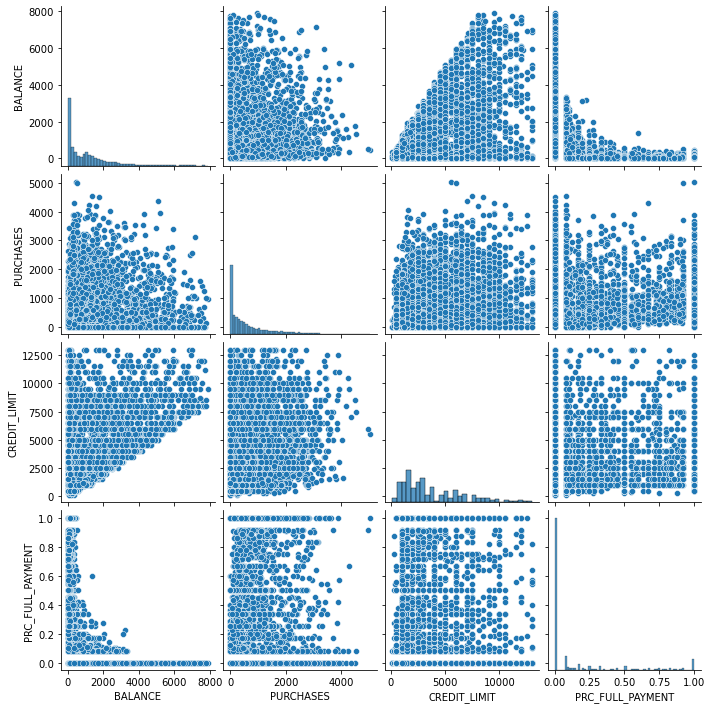

In [56]:
# compare all numerical features
sns.pairplot(data=df2)

In [57]:
# dataframe that will be used in algorithm
X = df2
X.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT
0,40.900749,95.40,1000.0,0.000000
1,3202.467416,0.00,7000.0,0.222222
2,2495.148862,773.17,7500.0,0.000000
4,817.714335,16.00,1200.0,0.000000
5,1809.828751,1333.28,1800.0,0.000000


In [59]:
# initialize KMeans to create 3 clusters
kmeans = KMeans(n_clusters=3)

In [60]:
# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(X)

KMeans(n_clusters=3)

In [61]:
# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index
kmeans.cluster_centers_

array([[1.16671978e+03, 8.43898585e+02, 5.33519211e+03, 2.02832055e-01],
       [3.13695955e+03, 8.35766411e+02, 8.92112845e+03, 1.02420011e-01],
       [8.14818813e+02, 4.57420015e+02, 1.89223067e+03, 1.36717585e-01]])

In [62]:
# create column in original dataframe with cluster group number
df2['cluster'] = kmeans.labels_
df2.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT,cluster
0,40.900749,95.40,1000.0,0.000000,2
1,3202.467416,0.00,7000.0,0.222222,1
2,2495.148862,773.17,7500.0,0.000000,1
4,817.714335,16.00,1200.0,0.000000,2
5,1809.828751,1333.28,1800.0,0.000000,2


In [221]:
df2.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT,cluster
count,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000
mean,1209.119252,611.646480,3735.794460,0.150390,1.324703
std,1447.528380,748.988946,2716.565362,0.285648,0.875658
min,0.004816,0.000000,150.000000,0.000000,0.000000
25%,114.752318,45.000000,1500.000000,0.000000,0.000000
50%,772.008306,340.000000,3000.000000,0.000000,2.000000
75%,1671.767080,892.000000,5500.000000,0.142857,2.000000
max,7886.875682,5044.360000,13000.000000,1.000000,2.000000


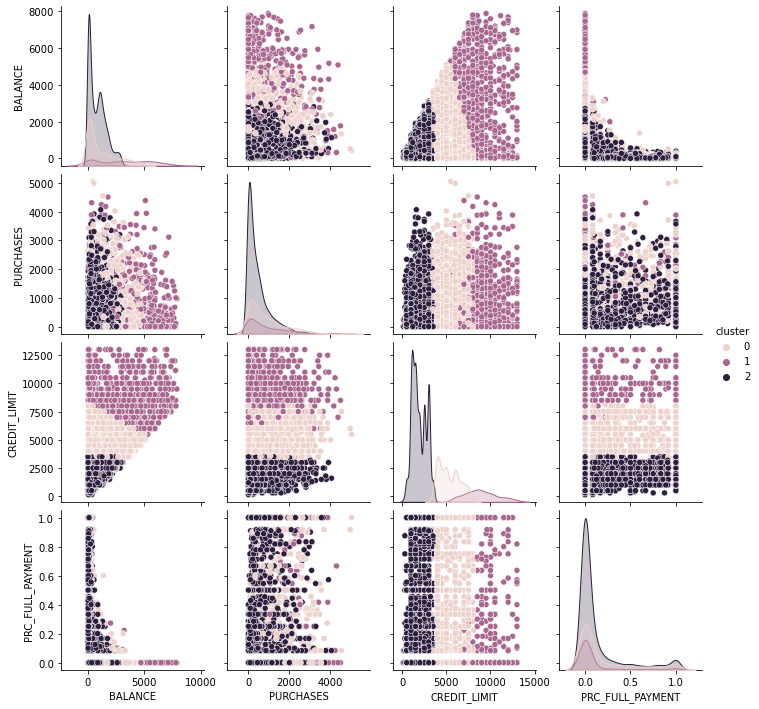

In [71]:
#visual of k clusters
sns.pairplot(data=df2, hue='cluster')

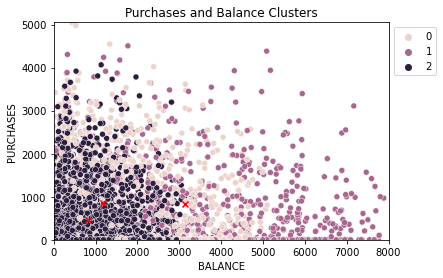

In [286]:
#CLUSTER ANALYSIS 1

plt.xlim([0, 8000])
plt.ylim([0, 5050])

# compare "PURCHASES" and "BALANCE"
sns.scatterplot(data=df2, x='BALANCE', y='PURCHASES', hue='cluster')

# scatterplot of centroid coordinates for purchases and balance
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

plt.title("Purchases and Balance Clusters")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [296]:
#ANALYZE CLUSTERS BASED ON BALANCE AND PURCHASES

# sort the cluster numbers from min(0) to max(2)
sorted_clusters = sorted(df2['cluster'].unique())

# select the rows of the same cluster number
# then get min/max purchases and average balance
print("Cluster Balances and Purchases\n")
for cluster_num in sorted_clusters:
    small_df2 = df2.loc[df2['cluster'] == cluster_num]
    min_prch = small_df2['PURCHASES'].min()
    max_prch = small_df2['PURCHASES'].max()
    avg_bal = small_df2['BALANCE'].mean()
    
    print(f"Cluster {cluster_num}: {int(min_prch)}-{int(max_prch)} purchases, avg balance: ${(avg_bal):.2f}")

Cluster Balances and Purchases

Cluster 0: 0-5044 purchases, avg balance: $1169.17
Cluster 1: 0-4504 purchases, avg balance: $3136.87
Cluster 2: 0-4063 purchases, avg balance: $815.33


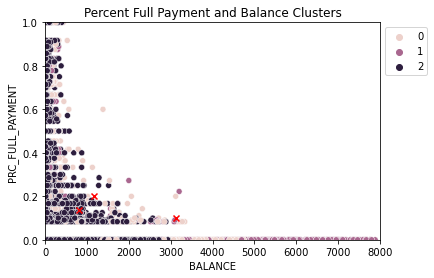

In [291]:
#CLUSTER ANALYSIS 2

plt.xlim([0, 8000])
plt.ylim([0, 1])


# compare "BALANCE" and "PRC_FULL_PAYMENT"
sns.scatterplot(data=df2, x='BALANCE', y='PRC_FULL_PAYMENT', hue='cluster')

# scatterplot of centroid coordinates for purchases and balance
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], c='red', marker='x')

plt.title("Percent Full Payment and Balance Clusters")

#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)


In [302]:
#ANALYZE CLUSTERS BASED ON BALANCE AND PRC FULL PAYMENT

# sort the cluster numbers from min(0) to max(2)
sorted_clusters = sorted(df2['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Balances and Percent Full Payment\n")
for cluster_num in sorted_clusters:
    small_df2 = df2.loc[df2['cluster'] == cluster_num]
    min_bal = small_df2['BALANCE'].min()
    max_bal = small_df2['BALANCE'].max()
    avg_prc = small_df2['PRC_FULL_PAYMENT'].mean()
    
    print(f"Cluster {cluster_num}: ${(min_bal):.2f}-${(max_bal):.2f} balance, avg prc full payment: {(avg_prc)*100:.2f}%")

Cluster Balances and Percent Full Payment

Cluster 0: $0.53-$5099.85 balance, avg prc full payment: 20.26%
Cluster 1: $0.49-$7886.88 balance, avg prc full payment: 10.28%
Cluster 2: $0.00-$3122.17 balance, avg prc full payment: 13.67%


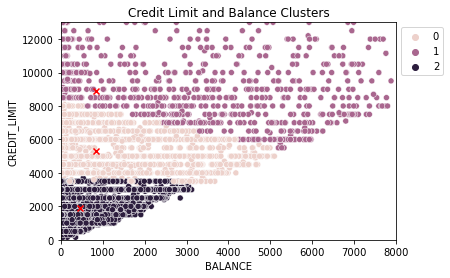

In [226]:
#CLUSTER ANALYSIS 3

plt.xlim([0, 8000])
plt.ylim([0, 13000])


# compare "BALANCE" and "CREDIT_LIMIT"
sns.scatterplot(data=df2, x='BALANCE', y='CREDIT_LIMIT', hue='cluster')

# scatterplot of centroid coordinates for purchases and balance
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Credit Limit and Balance Clusters")

#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [301]:
#ANALYZE CLUSTERS BASED ON BALANCE AND CREDIT LIMIT

# sort the cluster numbers from min(0) to max(2)
sorted_clusters = sorted(df2['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Balances and Credit Limits\n")
for cluster_num in sorted_clusters:
    small_df2 = df2.loc[df2['cluster'] == cluster_num]
    min_cred = small_df2['CREDIT_LIMIT'].min()
    max_cred = small_df2['CREDIT_LIMIT'].max()
    avg_bal = small_df2['BALANCE'].mean()
    
    print(f"Cluster {cluster_num}: ${int(min_cred)}-{int(max_cred)} credit limit, avg balance: ${int(avg_bal)}")

Cluster Balances and Credit Limits

Cluster 0: $3400-8100 credit limit, avg balance: $1169
Cluster 1: $5500-13000 credit limit, avg balance: $3136
Cluster 2: $150-3750 credit limit, avg balance: $815


In [72]:
df2.corr()

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT,cluster
BALANCE,1.000000,-0.020121,0.385517,-0.385236,-0.177305
PURCHASES,-0.020121,1.000000,0.251605,0.194814,-0.237924
CREDIT_LIMIT,0.385517,0.251605,1.000000,0.052422,-0.648134
PRC_FULL_PAYMENT,-0.385236,0.194814,0.052422,1.000000,-0.089939
cluster,-0.177305,-0.237924,-0.648134,-0.089939,1.000000


In [65]:
df2.loc[df2["cluster"]==0]

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT,cluster
8,1014.926473,861.49,7000.0,0.000000,0
13,921.693369,2137.93,7500.0,0.083333,0
29,22.063490,100.00,6900.0,0.000000,0
31,1162.273324,1347.71,6000.0,0.000000,0
37,4047.480828,2380.55,5000.0,0.000000,0
...,...,...,...,...,...
8725,1374.266113,1814.30,6500.0,0.000000,0
8740,1520.623758,0.00,5000.0,0.000000,0
8804,1704.571464,0.00,5000.0,0.000000,0
8839,3271.424058,1173.28,5000.0,0.000000,0


In [303]:
#customers in cluster 0

len(df2.loc[df2["cluster"]==0])

1776

In [66]:
# descriptive stats for cluster 0
cluster0 = df2.loc[df2['cluster'] == 0]
cluster0.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT,cluster
count,1776.000000,1776.000000,1776.000000,1776.000000,1776.0
mean,1169.166497,844.247038,5338.305635,0.202604,0.0
std,1342.351020,866.430005,1207.060667,0.321124,0.0
min,0.533581,0.000000,3400.000000,0.000000,0.0
25%,88.083101,146.512500,4000.000000,0.000000,0.0
50%,510.872245,547.770000,5000.000000,0.000000,0.0
75%,1930.761900,1276.935000,6000.000000,0.333333,0.0
max,5099.850196,5044.360000,8100.000000,1.000000,0.0


In [67]:
#number of customers in cluster 1

len(df2.loc[df2["cluster"]==1])

830

In [68]:
# descriptive stats for cluster 1
cluster1 = df2.loc[df2['cluster'] == 1]
cluster1.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT,cluster
count,830.000000,830.000000,830.000000,830.000000,830.0
mean,3136.865254,836.008157,8929.638554,0.102790,1.0
std,2323.353759,936.641710,1808.281076,0.256276,0.0
min,0.488050,0.000000,5500.000000,0.000000,1.0
25%,658.299958,22.545000,7500.000000,0.000000,1.0
50%,3055.355927,515.630000,9000.000000,0.000000,1.0
75%,5197.956275,1341.562500,10000.000000,0.000000,1.0
max,7886.875682,4504.250000,13000.000000,1.000000,1.0


In [69]:
#number of customers in cluster 2

len(df2.loc[df2["cluster"]==2])

3883

In [70]:
cluster2 = df2.loc[df2["cluster"]==2]

cluster2.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,PRC_FULL_PAYMENT,cluster
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.0
mean,815.332724,457.302215,1892.644719,0.136682,2.0
std,758.234804,589.606881,792.888533,0.270691,0.0
min,0.004816,0.000000,150.000000,0.000000,2.0
25%,101.111036,0.000000,1200.000000,0.000000,2.0
50%,676.221211,248.760000,1800.000000,0.000000,2.0
75%,1290.959535,635.330000,2500.000000,0.111111,2.0
max,3122.171879,4063.490000,3750.000000,1.000000,2.0


# Observations of 1st K Means Model (4 variables, k = 3)

- cluster 0 = medium credit limit, medium avg balance, high prc full pmt
- cluster 1 = high credit limit, high avg balance, low prc full pmt
- cluster 2 = low credit limit, low avg balance, medium prc full pmt

In [227]:
#creating another dataset to visualize and cluster
df3 = df.copy()

In [228]:
df3.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,zscore_cash_advance_frequency,zscore_cash_advance_trx,zscore_purchases_trx,zscore_credit_limit,zscore_payments,zscore_minimum_payments,zscore_prc_full_payment,zscore_tenure,BALANCE_GROUP,PURCHASES_GROUP
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0.689957,0.565958,0.606781,0.932814,0.688298,0.296642,0.529184,0.367787,0 - 499,"0 - 1,009"
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0.619156,0.320837,0.730513,0.980356,2.045772,0.197560,0.240266,0.367787,"2,000 - 3,999","0 - 1,009"
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0.689957,0.565958,0.011878,1.139786,0.393767,0.038225,0.529184,0.367787,"2,000 - 3,999","0 - 1,009"
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0.689957,0.565958,0.668647,0.869041,0.354333,0.240865,0.529184,0.367787,500 - 999,"0 - 1,009"
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,0.689957,0.565958,0.235586,0.677724,0.151467,0.904776,0.529184,0.367787,"1,000 - 1,999","1,010 - 2,019"


In [229]:
df3.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'zscore_balance',
       'zscore_balance_freq', 'zscore_purchases', 'zscore_oneoff_purchases',
       'zscore_installments_purchases', 'zscore_cash_advance',
       'zscore_purchases_frequency', 'zscore_oneoff_purchases_frequency',
       'zscore_purchases_installments_frequency',
       'zscore_cash_advance_frequency', 'zscore_cash_advance_trx',
       'zscore_purchases_trx', 'zscore_credit_limit', 'zscore_payments',
       'zscore_minimum_payments', 'zscore_prc_full_payment', 'zscore_tenure',
       'BALANCE_GROUP', 'PURCHASES_GROUP'],
      dtype='object')

In [230]:
df3.drop(columns = ['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'TENURE', 'zscore_balance',
       'zscore_balance_freq', 'zscore_purchases', 'zscore_oneoff_purchases',
       'zscore_installments_purchases', 'zscore_cash_advance',
       'zscore_purchases_frequency', 'zscore_oneoff_purchases_frequency',
       'zscore_purchases_installments_frequency',
       'zscore_cash_advance_frequency', 'zscore_cash_advance_trx',
       'zscore_purchases_trx', 'zscore_credit_limit', 'zscore_payments',
       'zscore_minimum_payments', 'zscore_prc_full_payment', 'zscore_tenure',
       'BALANCE_GROUP', 'PURCHASES_GROUP'], inplace = True)

df3.head()

,BALANCE,PURCHASES_FREQUENCY,PRC_FULL_PAYMENT
0,40.900749,0.166667,0.000000
1,3202.467416,0.000000,0.222222
2,2495.148862,1.000000,0.000000
4,817.714335,0.083333,0.000000
5,1809.828751,0.666667,0.000000


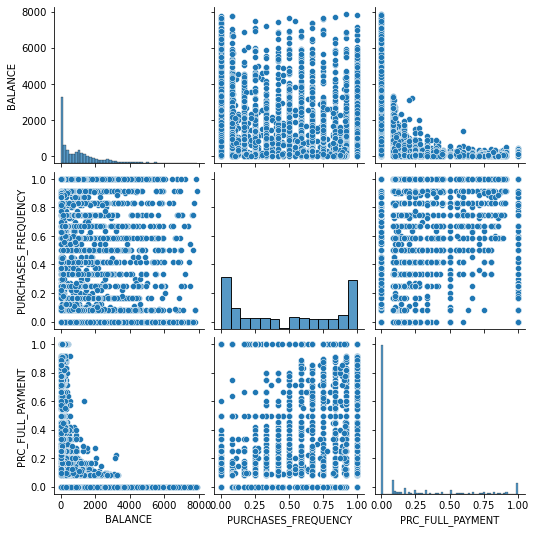

In [232]:
#visualize bivariate data relationships (without clusters)
sns.pairplot(data = df3)

In [239]:
# dataframe that will be used in algorithm
X = df3
X.describe()

,BALANCE,PURCHASES_FREQUENCY,PRC_FULL_PAYMENT,cluster
count,6489.000000,6489.000000,6489.000000,6489.000000
mean,1209.119252,0.476862,0.150390,0.793034
std,1447.528380,0.391827,0.285648,0.570688
min,0.004816,0.000000,0.000000,0.000000
25%,114.752318,0.083333,0.000000,0.000000
50%,772.008306,0.444444,0.000000,1.000000
75%,1671.767080,0.916667,0.142857,1.000000
max,7886.875682,1.000000,1.000000,2.000000


In [234]:
# initialize KMeans to create 3 clusters
kmeans2 = KMeans(n_clusters=3)

In [235]:
kmeans2.fit(X)

KMeans(n_clusters=3)

In [236]:
# create column in original dataframe with cluster group number
df3['cluster'] = kmeans2.labels_
df3.head()

,BALANCE,PURCHASES_FREQUENCY,PRC_FULL_PAYMENT,cluster
0,40.900749,0.166667,0.000000,1
1,3202.467416,0.000000,0.222222,0
2,2495.148862,1.000000,0.000000,0
4,817.714335,0.083333,0.000000,1
5,1809.828751,0.666667,0.000000,0


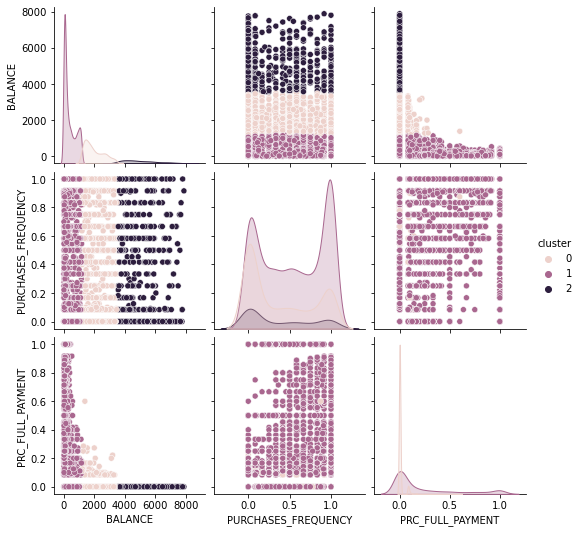

In [237]:
sns.pairplot(data = df3, hue = "cluster")

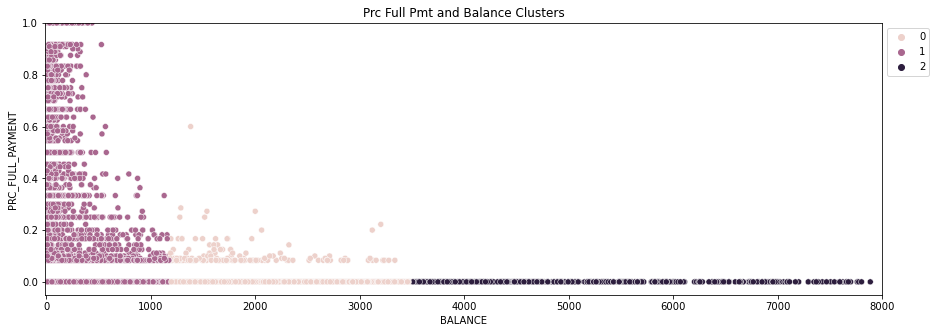

In [319]:
#2nd CLUSTER ANALYSIS 1

plt.figure(figsize=(15,5))
plt.xlim([-10, 8000])
plt.ylim([-.05, 1])


# compare "BALANCE" and "PRC_FULL_PAYMENT"
sns.scatterplot(data=df3, x='BALANCE', y='PRC_FULL_PAYMENT', hue='cluster')

# scatterplot of centroid coordinates for purchases and balance
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Prc Full Pmt and Balance Clusters")

#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [308]:
#ANALYZE CLUSTERS BASED ON BALANCE AND PRC FULL PMT

# sort the cluster numbers from min(0) to max(2)
sorted_clusters = sorted(df3['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Balances and Prc Full Pmt\n")
for cluster_num in sorted_clusters:
    small_df3 = df3.loc[df3['cluster'] == cluster_num]
    min_bal = small_df3['BALANCE'].min()
    max_bal = small_df3['BALANCE'].max()
    avg_prc = small_df3['PRC_FULL_PAYMENT'].mean()
    
    print(f"Cluster {cluster_num}: ${int(min_bal)}-{int(max_bal)} balance, avg prc full pmt: {(avg_prc)*100:.2f}%")

Cluster Balances and Prc Full Pmt

Cluster 0: $1175-3497 balance, avg prc full pmt: 0.87%
Cluster 1: $0-1175 balance, avg prc full pmt: 23.42%
Cluster 2: $3508-7886 balance, avg prc full pmt: 0.00%


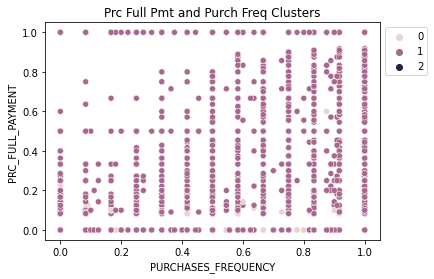

In [246]:
#2nd CLUSTER ANALYSIS 2

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])


# compare "PURCHASES_FREQUENCY" and "PRC_FULL_PAYMENT"
sns.scatterplot(data=df3, x='PURCHASES_FREQUENCY', y='PRC_FULL_PAYMENT', hue='cluster')

# scatterplot of centroid coordinates for purchases and balance
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Prc Full Pmt and Purch Freq Clusters")

#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [322]:
#ANALYZE CLUSTERS BASED ON PURCH FREQ AND PRC FULL PMT

# sort the cluster numbers from min(0) to max(2)
sorted_clusters = sorted(df3['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Purchase Freq and Prc Full Pmt\n")
for cluster_num in sorted_clusters:
    small_df3 = df3.loc[df3['cluster'] == cluster_num]
    min_prc = small_df3['PRC_FULL_PAYMENT'].min()
    max_prc = small_df3['PRC_FULL_PAYMENT'].max()
    avg_purchf = small_df3['PURCHASES_FREQUENCY'].mean()
    
    print(f"Cluster {cluster_num}: {(min_prc)*100:.2f}%-{(max_prc)*100:.2f}% prc full pmt, avg purch freq: {(avg_purchf)*100:.2f}%")

Cluster Purchase Freq and Prc Full Pmt

Cluster 0: 0.00%-60.00% prc full pmt, avg purch freq: 37.88%
Cluster 1: 0.00%-100.00% prc full pmt, avg purch freq: 53.51%
Cluster 2: 0.00%-0.00% prc full pmt, avg purch freq: 37.06%


# Observations on 2nd K Means Model
- similar groupings as 1st
- interesting: purchase frequency is bimodal for all clusters
- cluster 0: medium balance, medium prc full pmt, medium purch freq
- cluster 1: low balance, high prc full pmt, high purch freq
- cluster 2: high balance, low prc full pmt, medium purch freq

In [323]:
#new dataframe for another k means model
df4 = df.copy()

In [324]:
df4.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'zscore_balance',
       'zscore_balance_freq', 'zscore_purchases', 'zscore_oneoff_purchases',
       'zscore_installments_purchases', 'zscore_cash_advance',
       'zscore_purchases_frequency', 'zscore_oneoff_purchases_frequency',
       'zscore_purchases_installments_frequency',
       'zscore_cash_advance_frequency', 'zscore_cash_advance_trx',
       'zscore_purchases_trx', 'zscore_credit_limit', 'zscore_payments',
       'zscore_minimum_payments', 'zscore_prc_full_payment', 'zscore_tenure',
       'BALANCE_GROUP', 'PURCHASES_GROUP'],
      dtype='object')

In [325]:
df4.drop(columns =['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'zscore_balance',
       'zscore_balance_freq', 'zscore_purchases', 'zscore_oneoff_purchases',
       'zscore_installments_purchases', 'zscore_cash_advance',
       'zscore_purchases_frequency', 'zscore_oneoff_purchases_frequency',
       'zscore_purchases_installments_frequency',
       'zscore_cash_advance_frequency', 'zscore_cash_advance_trx',
       'zscore_purchases_trx', 'zscore_credit_limit', 'zscore_payments',
       'zscore_minimum_payments', 'zscore_prc_full_payment', 'zscore_tenure',
       'BALANCE_GROUP', 'PURCHASES_GROUP', "TENURE"], inplace = True)

df4.describe()

,ONEOFF_PURCHASES_FREQUENCY,CREDIT_LIMIT,PRC_FULL_PAYMENT
count,6489.000000,6489.000000,6489.000000
mean,0.175238,3735.794460,0.150390
std,0.271272,2716.565362,0.285648
min,0.000000,150.000000,0.000000
25%,0.000000,1500.000000,0.000000
50%,0.083333,3000.000000,0.000000
75%,0.250000,5500.000000,0.142857
max,1.000000,13000.000000,1.000000


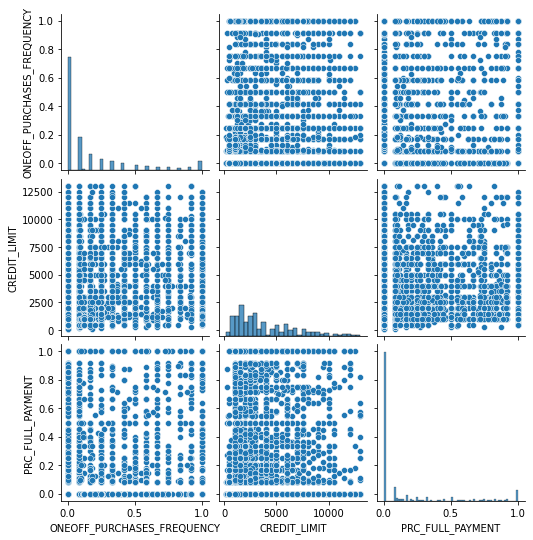

In [326]:
sns.pairplot(data = df4)

In [327]:
# dataframe that will be used in algorithm
X = df4
X.head()

,ONEOFF_PURCHASES_FREQUENCY,CREDIT_LIMIT,PRC_FULL_PAYMENT
0,0.000000,1000.0,0.000000
1,0.000000,7000.0,0.222222
2,1.000000,7500.0,0.000000
4,0.083333,1200.0,0.000000
5,0.000000,1800.0,0.000000


In [328]:
# initialize KMeans to create 3 clusters
kmeans3 = KMeans(n_clusters=3)

In [329]:
#fit to data
kmeans3.fit(X)

KMeans(n_clusters=3)

In [330]:
df4["cluster"] = kmeans3.labels_
df4.head()

,ONEOFF_PURCHASES_FREQUENCY,CREDIT_LIMIT,PRC_FULL_PAYMENT,cluster
0,0.000000,1000.0,0.000000,1
1,0.000000,7000.0,0.222222,0
2,1.000000,7500.0,0.000000,2
4,0.083333,1200.0,0.000000,1
5,0.000000,1800.0,0.000000,1


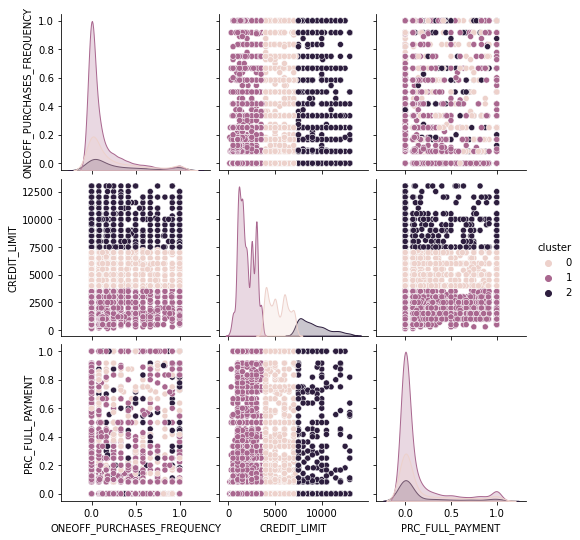

In [331]:
sns.pairplot(data = df4, hue = "cluster")

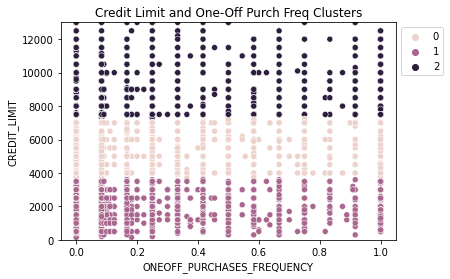

In [338]:
#3rd CLUSTER ANALYSIS 1

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 13000])


# compare "ONEOFF_PURCHASES_FREQUENCY" and "CREDIT_LIMIT"
sns.scatterplot(data=df4, x='ONEOFF_PURCHASES_FREQUENCY', y='CREDIT_LIMIT', hue='cluster')

# scatterplot of centroid coordinates for purchases and balance
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

plt.title("Credit Limit and One-Off Purch Freq Clusters")

#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [342]:
#ANALYZE CLUSTERS BASED ON ONE-OFF PURCH FREQ AND CREDIT LIMIT

# sort the cluster numbers from min(0) to max(2)
sorted_clusters = sorted(df4['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Purchase Freq and Prc Full Pmt\n")
for cluster_num in sorted_clusters:
    small_df4 = df4.loc[df4['cluster'] == cluster_num]
    min_cred = small_df4['CREDIT_LIMIT'].min()
    max_cred = small_df4['CREDIT_LIMIT'].max()
    avg_oneofffreq = small_df4['ONEOFF_PURCHASES_FREQUENCY'].mean()
    
    print(f"Cluster {cluster_num}: ${int(min_cred)}-${int(max_cred)} credit limit, avg one-off purch freq: {int(avg_oneofffreq)*100:.2f}%")

Cluster Purchase Freq and Prc Full Pmt

Cluster 0: $3650-$7227 credit limit, avg one-off purch freq: 0.00%
Cluster 1: $150-$3600 credit limit, avg one-off purch freq: 0.00%
Cluster 2: $7300-$13000 credit limit, avg one-off purch freq: 0.00%


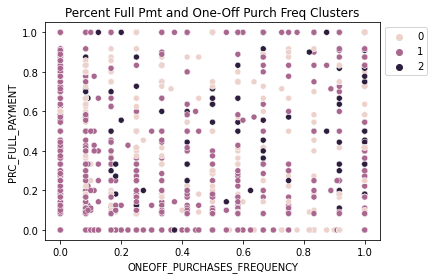

In [344]:
#3rd CLUSTER ANALYSIS 2

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])


# compare "ONEOFF_PURCHASES_FREQUENCY" and "TENURE"
sns.scatterplot(data=df4, x='ONEOFF_PURCHASES_FREQUENCY', y='PRC_FULL_PAYMENT', hue='cluster')

# scatterplot of centroid coordinates for ONEOFF_PURCHASES_FREQUENCY and TENURE
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("Percent Full Pmt and One-Off Purch Freq Clusters")

#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [347]:
#ANALYZE CREDIT LIMIT BASED ON ONEOFF PURCH AND TENURE

# sort the cluster numbers from min(0) to max(2)
sorted_clusters = sorted(df4['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Income Ranges\n")
for cluster_num in sorted_clusters:
    small_df4 = df4.loc[df4['cluster'] == cluster_num]
    min_oneoff_purch_freq = small_df4['ONEOFF_PURCHASES_FREQUENCY'].min()
    max_oneoff_purch_freq = small_df4['ONEOFF_PURCHASES_FREQUENCY'].max()
    avg_prcpmt = small_df4['PRC_FULL_PAYMENT'].mean()
    
    print(f"Cluster {cluster_num}: {(min_oneoff_purch_freq)*100:.2f}%-{(max_oneoff_purch_freq)*100:.2f}% purchase frequency, avg prc full pmt: {(avg_prcpmt)*100:.2f}%")

Cluster Income Ranges

Cluster 0: 0.00%-100.00% purchase frequency, avg prc full pmt: 17.68%
Cluster 1: 0.00%-100.00% purchase frequency, avg prc full pmt: 13.57%
Cluster 2: 0.00%-100.00% purchase frequency, avg prc full pmt: 16.56%


# Observations on 3rd K Means Model
- only significant differences based on credit limit

# K Means with Groupings

In [202]:
#create 5 groups for balance

def bal_group(BALANCE):
    if BALANCE <500:
        group = "0 - 499"
    elif BALANCE <1000:
        group = "500 - 999"
    elif BALANCE <2000:
        group = "1,000 - 1,999"
    elif BALANCE <4000:
        group = "2,000 - 3,999"
    elif BALANCE <8000:
        group = "4,000 - 7,999"
        
    return group

In [203]:
# assign groups to BALANCE columns
df["BALANCE_GROUP"]=df["BALANCE"].apply(bal_group)

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,zscore_cash_advance_frequency,zscore_cash_advance_trx,zscore_purchases_trx,zscore_credit_limit,zscore_payments,zscore_minimum_payments,zscore_prc_full_payment,zscore_tenure,BALANCE_GROUP,PURCHASES_GROUP
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0.689957,0.565958,0.606781,0.932814,0.688298,0.296642,0.529184,0.367787,0 - 499,"0 - 1,009"
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0.619156,0.320837,0.730513,0.980356,2.045772,0.197560,0.240266,0.367787,"2,000 - 3,999","0 - 1,009"
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0.689957,0.565958,0.011878,1.139786,0.393767,0.038225,0.529184,0.367787,"2,000 - 3,999","0 - 1,009"
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0.689957,0.565958,0.668647,0.869041,0.354333,0.240865,0.529184,0.367787,500 - 999,"0 - 1,009"
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,0.689957,0.565958,0.235586,0.677724,0.151467,0.904776,0.529184,0.367787,"1,000 - 1,999","1,010 - 2,019"


In [204]:
#create 5 groups for purchases

def purch_group(PURCHASES):
    if PURCHASES <1010:
        group = "0 - 1,009"
    elif PURCHASES <2020:
        group = "1,010 - 2,019"
    elif PURCHASES <3030:
        group = "2,020 - 3,029"
    elif PURCHASES <4040:
        group = "3,030 - 4,039"
    elif PURCHASES <5050:
        group = "4,040 - 5,049"
        
    return group

In [205]:
# assign groups to PURCHASES columns
df["PURCHASES_GROUP"]=df["PURCHASES"].apply(purch_group)

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,zscore_cash_advance_frequency,zscore_cash_advance_trx,zscore_purchases_trx,zscore_credit_limit,zscore_payments,zscore_minimum_payments,zscore_prc_full_payment,zscore_tenure,BALANCE_GROUP,PURCHASES_GROUP
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0.689957,0.565958,0.606781,0.932814,0.688298,0.296642,0.529184,0.367787,0 - 499,"0 - 1,009"
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0.619156,0.320837,0.730513,0.980356,2.045772,0.197560,0.240266,0.367787,"2,000 - 3,999","0 - 1,009"
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0.689957,0.565958,0.011878,1.139786,0.393767,0.038225,0.529184,0.367787,"2,000 - 3,999","0 - 1,009"
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0.689957,0.565958,0.668647,0.869041,0.354333,0.240865,0.529184,0.367787,500 - 999,"0 - 1,009"
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,0.689957,0.565958,0.235586,0.677724,0.151467,0.904776,0.529184,0.367787,"1,000 - 1,999","1,010 - 2,019"


In [186]:
df5 = df.copy()

In [187]:
df5.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,zscore_cash_advance_frequency,zscore_cash_advance_trx,zscore_purchases_trx,zscore_credit_limit,zscore_payments,zscore_minimum_payments,zscore_prc_full_payment,zscore_tenure,BALANCE_GROUP,PURCHASES_GROUP
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0.689957,0.565958,0.606781,0.932814,0.688298,0.296642,0.529184,0.367787,0 - 499,"0 - 1,009"
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0.619156,0.320837,0.730513,0.980356,2.045772,0.197560,0.240266,0.367787,"2,000 - 3,999","0 - 1,009"
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0.689957,0.565958,0.011878,1.139786,0.393767,0.038225,0.529184,0.367787,"2,000 - 3,999","0 - 1,009"
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0.689957,0.565958,0.668647,0.869041,0.354333,0.240865,0.529184,0.367787,500 - 999,"0 - 1,009"
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,0.689957,0.565958,0.235586,0.677724,0.151467,0.904776,0.529184,0.367787,"1,000 - 1,999","1,010 - 2,019"


In [188]:
def prc(x, y):
    if y == 0.0:
        return 0
    else:
        return x/y

df5["PRC_INSTALLMENT_PURCHASES"] = prc(df5["INSTALLMENTS_PURCHASES"], df5["PURCHASES"])

df5.head()

#how to exclude division by zero?



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [189]:
df5.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'zscore_balance',
       'zscore_balance_freq', 'zscore_purchases', 'zscore_oneoff_purchases',
       'zscore_installments_purchases', 'zscore_cash_advance',
       'zscore_purchases_frequency', 'zscore_oneoff_purchases_frequency',
       'zscore_purchases_installments_frequency',
       'zscore_cash_advance_frequency', 'zscore_cash_advance_trx',
       'zscore_purchases_trx', 'zscore_credit_limit', 'zscore_payments',
       'zscore_minimum_payments', 'zscore_prc_full_payment', 'zscore_tenure',
       'BALANCE_GROUP', 'PURCHASES_GROUP'],
      dtype='object')

In [190]:
df5.drop(columns = ['CUST_ID', 'BALANCE_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'TENURE', 'zscore_balance',
       'zscore_balance_freq', 'zscore_purchases', 'zscore_oneoff_purchases',
       'zscore_installments_purchases', 'zscore_cash_advance',
       'zscore_purchases_frequency', 'zscore_oneoff_purchases_frequency',
       'zscore_purchases_installments_frequency',
       'zscore_cash_advance_frequency', 'zscore_cash_advance_trx',
       'zscore_purchases_trx', 'zscore_credit_limit', 'zscore_payments',
       'zscore_minimum_payments', 'zscore_prc_full_payment', 'zscore_tenure',
       'PURCHASES_GROUP'], inplace = True)

df5.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,PRC_FULL_PAYMENT,BALANCE_GROUP
0,40.900749,95.40,0.00,0.000000,0 - 499
1,3202.467416,0.00,0.00,0.222222,"2,000 - 3,999"
2,2495.148862,773.17,773.17,0.000000,"2,000 - 3,999"
4,817.714335,16.00,16.00,0.000000,500 - 999
5,1809.828751,1333.28,0.00,0.000000,"1,000 - 1,999"


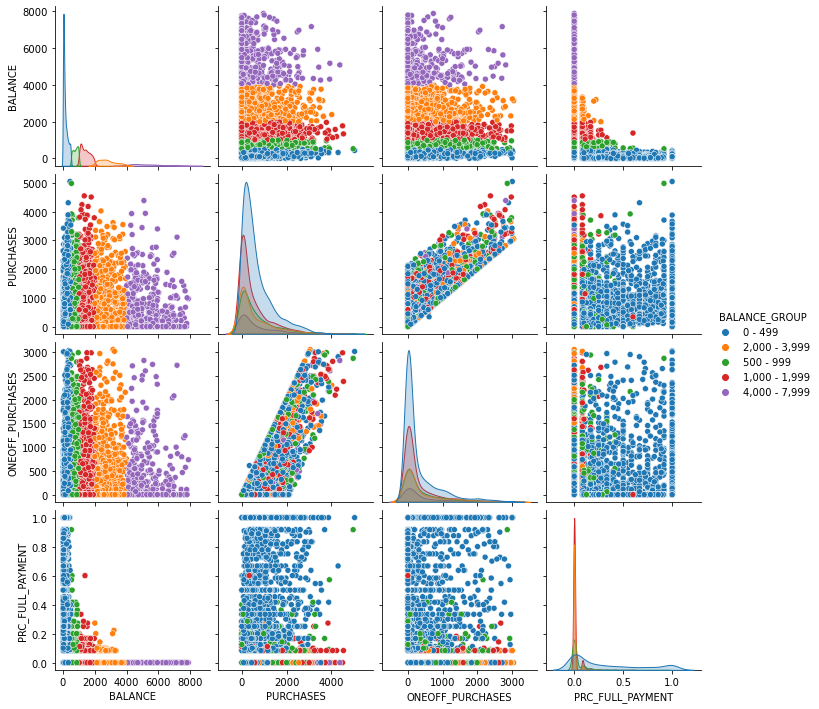

In [191]:
#visualize based on balances

sns.pairplot(data = df5, hue = "BALANCE_GROUP")

#interesting: people with balance between $1k and $4k making lowest % payments

In [192]:
# dataframe that will be used in algorithm
X = df5[["BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "PRC_FULL_PAYMENT"]]
X.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,PRC_FULL_PAYMENT
0,40.900749,95.40,0.00,0.000000
1,3202.467416,0.00,0.00,0.222222
2,2495.148862,773.17,773.17,0.000000
4,817.714335,16.00,16.00,0.000000
5,1809.828751,1333.28,0.00,0.000000


In [194]:
# initialize KMeans to create 3 clusters
kmeans4 = KMeans(n_clusters=3)

In [195]:
# fit KMeans to data
kmeans4.fit(X)

KMeans(n_clusters=3)

In [200]:
df5['CLUSTER'] = kmeans.labels_
df5.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,PRC_FULL_PAYMENT,BALANCE_GROUP,CLUSTER
0,40.900749,95.40,0.00,0.000000,0 - 499,2
1,3202.467416,0.00,0.00,0.222222,"2,000 - 3,999",1
2,2495.148862,773.17,773.17,0.000000,"2,000 - 3,999",1
4,817.714335,16.00,16.00,0.000000,500 - 999,2
5,1809.828751,1333.28,0.00,0.000000,"1,000 - 1,999",2


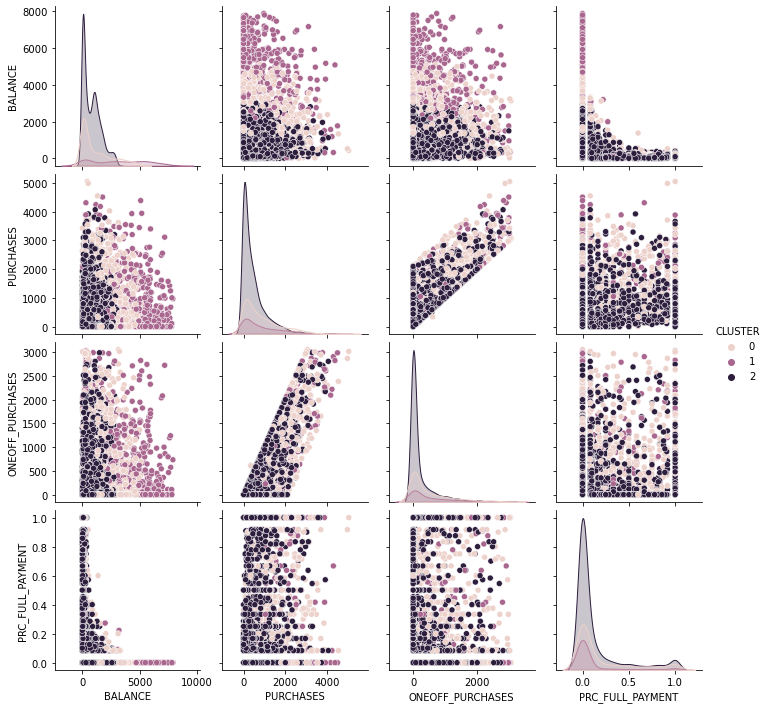

In [201]:
#visualize based on clusters

# compare all numerical features by cluster group
sns.pairplot(data=df5, hue='CLUSTER')

# Observations on 4th K Means Model
- clusters again seem to be based on balance level